#  Neutron Star as a signal for Quark-Gluon Plasma formation

**Quark Matter Equation of State (EoS) inside a Neutron Star**

Quark matter inside the cores of neutron stars is known as quark-gluon plasma. This study explores the **quark matter Equation of State (EoS)** using the **Density Dependent Quark Mass (DDQM) model**, an extension of the **MIT Bag model**, to describe neutron stars.

Thermodynamic quantities like **pressure**, **energy density**, **entropy**, **specific heat**, and **speed of sound** are
computed across temperatures and are then compared with Lattice QCD and Curvature data results.


## Notebook Workflow
**1)** [Introducing Neutron Stars](#h1)          
**2)** [Problem Statement](#h2)        
**3)** [Setting up the Parameters](#h3)       
**4)** [Calculating the Thermodynamic Quantities](#h4)         
**5)** [Conclusions](#h5)       


## Introducing Neutron Stars <a name = 'h1'><a>
   
Imagine a star like our Sun, but with one major difference — it's reached the end of its life. No longer powered by nuclear fusion, it has exhausted all its fuel. When a **massive star** runs out of energy, gravity causes the core to collapse while the outer layers are blasted away in a powerful explosion known as a **supernova**.

<img src='https://cdn.britannica.com/92/124492-050-047F11FB/image-Kepler-Nova-Keplers-Supernova-Chandra-X-ray.jpg' width=45%>

Breathtaking, isn't it? But don’t let the beauty fool you—this event is immensely violent. In the aftermath, temperatures and pressures skyrocket, forging elements heavier than iron. Deep within, the collapsing core becomes so dense that **protons and electrons combine to form neutrons**, leading to the creation of an incredibly compact object: a **neutron star**.

<img src='https://cdn.mos.cms.futurecdn.net/7BHv7n2L3KJNuRgDDbaJVf-1200-80.jpg' width=55%>

To grasp how dense these stars are, consider this: a typical neutron star has a **diameter of only about 20 kilometers**—roughly the size of a city—but packs in **1.4 times the mass of the Sun**. That’s so dense that a **single teaspoon of neutron star material would weigh around a billion tons on Earth**.

Their **surface gravity** is nearly **2 × 10¹¹ times stronger than Earth’s**, and they can possess **magnetic fields a million times more powerful** than anything generated in labs on Earth. These extreme conditions cause them to warp spacetime significantly, producing effects like **gravitational lensing**, where even light is bent around the star.

<img src='https://preview.redd.it/7jeg0262j8g81.jpg?width=1080&format=pjpg&auto=webp&s=0c4bc69b0eb836b0253eb6a14249c72aade1935e' width=45%>

Despite their small size, neutron stars can **rotate hundreds of times per second**, emitting beams of radiation from their magnetic poles. As they spin, these beams sweep across space, and when aligned just right, we observe them as **pulsars** from Earth.

These extraordinary remnants of stellar death offer a remarkable opportunity to probe the **most extreme physical conditions** in the universe. In this study, we will explore the **quark matter Equation of State** (EoS) within neutron stars and examine how various **thermodynamic properties** of quark matter behave under extreme conditions.


## Problem Statement <a name = 'h2'><a>
    

We will be computing the Equation of State (EoS) for quark matter in neutron star cores using numerical methods such as **Gauss-Legendre quadrature** integration and **finite difference** derivatives, implemented within the TensorFlow framework for automatic differentiation and potential deep learning applications.

## Installing Tensorflow

In [1]:
pip install tensorflow


  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached ml_dtypes-0.5.1-cp310-cp310-win_amd64.whl.metadata (22 kB)
Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl (375.7 MB)
Using cached ml_dtypes-0.5.1-cp310-cp310-win_amd64.whl (209 kB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)

  Attempting uninstall: ml-dtypes

    Found existing installation: ml-dtypes 0.2.0

    Uninstalling ml-dtypes-0.2.0:

      Successfully uninstalled ml-dtypes-0.2.0

   ---------------------------------------- 0/4 [ml-dtypes]
   ---------------------------------------- 0/4 [ml-dtypes]
  Attempting uninstall: tensorboard
   ---------------------------------------- 0/4 [ml-dtypes]
    Found existing installation: tensorboard 2.15.2
   ----------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.10.0 which is incompatible.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.19.0 which is incompatible.


In [2]:
!pip uninstall -y tensorflow tensorflow-gpu tensorflow-cpu keras

Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: tensorflow-cpu 2.15.0
Uninstalling tensorflow-cpu-2.15.0:
  Successfully uninstalled tensorflow-cpu-2.15.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0


In [3]:
!pip install tensorflow-cpu==2.15 --no-cache-dir --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.6.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.2.0 which is incompatible.
jaxlib 0.6.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.2.0 which is incompatible.


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Density Dependent Quark Mass Model

The quark-gluon plasma is referred to as **strange quark matter** (SQM).
We study the general properties in the framework of a new EoS in which the quark **masses are parametrized** as functions of the baryon density $n_B$ as follows:
$$
m_u = m_d = \frac{c}{3n_B}, \quad m_s = m_{s0} + \frac{c}{3n_B}
$$
Here, $m_{s0}$ is the strange quark current mass and $c$ is a constant. 

---
The system is in the presence of a magnetic field $B$ which is directed along the z-axis 
The energy of the charged particle of mass $m_i$ and charge $q_i$ in the presence of the $B$ is given by:
$$
\epsilon_i^{} = \left[ m_i^2 + p_{z,i}^2 + 2 q_i B n \right]^{1/2}
$$
where $p_z$ is the momentum along the z-axis, 
n is represents the Landau level. 

---

## Setting up the parameters <a name = 'h3'><a>

In [4]:
# Constants
c = 75  # MeV fm^-3
B = 5e4  # MeV^2
n = 1
q_e = 1
q_u = 2/3
q_d = -1/3
q_s = 1/3
g_u = g_d = g_s = 6
g_e = 2
m_e = 0.511
mu_u = 293
mu_d = 300
mu_s = 300
mu_e = 7
pi = np.pi

# Baryon density (fixed)
n_B = 1
m_u = c / (3 * n_B)
m_d = m_u
m_s = m_u + 140

# Thermodynamic Potential

The **thermodynamic potential** is given by:  
$$
\Omega = \sum_i \Omega_i - \frac{8}{45} \pi^2 T^4
$$  
where the second term is the contribution due to gluons.

---

The general expression for the thermodynamic potential $\Omega_i$ in the presence of a magnetic field $B$ is:  
$$
    \Omega_i = -T \frac{g_i q_i}{2 \pi^2} B \int dp_z \, \ln \left[ 1 - e^{-\beta (\epsilon_i - \mu_i)} \right]
$$

- $i = \{u, d, s, e\}$  
- $g_i$ is the degeneracy factor (e.g., 6 for quarks, 2 for electrons)  
- $\beta = 1/T$  
- $\mu_i$ is the chemical potential
---
The thermodynamical properties, pressure $P_i$, energy density $E_i$, entropy $S$, and specific heat $C_v$  can be calculated from $\Omega$ which provides us the equation of state (EoS) for the system.

## Thermodynamic Relations

The standard thermodynamics gives the following relations:

$$
P(k, T) = -\Omega_{\text{total}}
$$

$$
E(k, T) = -T^2 \left[ \frac{\partial}{\partial T} \left( \frac{\Omega_{\text{total}}}{T} \right) \right]
$$

$$
S(k, T) = -\frac{4}{3}T \left[ \frac{\partial}{\partial T} \left( \frac{\Omega_{\text{total}}}{T} \right) \right]
$$

$$
C_v(k, T) = T \left[ \frac{\partial S}{\partial T} \right]
$$


# Numericals Methods to be used

## 1) Performing Gauss Quadrature method for solving the integral

The **Gauss quadrature method** is a numerical technique used to approximate definite integrals of the form:

$$
\int_a^b W(x) f(x)\, dx \approx \sum_{i=1}^n w_i f(x_i)
$$

- $ W(x)$: weight function  
- $ w_i $: quadrature weights  
- $ x_i $: quadrature nodes (function evaluation points)

Instead of evaluating the function at evenly spaced points (as in the trapezoidal or Simpson’s rule), Gauss quadrature chooses optimal points (called **nodes** or $x_i$) and **weights** ($w_i$) to get the most accurate result for a given number of evaluations.

---

### Types of Gauss Quadrature (Based on Weight Function)

Different Gauss quadrature methods are tailored to specific weight functions $ W(x)$:

1. Gauss–Chebyshev:
   $$
   \int_{-1}^1 \frac{f(x)}{\sqrt{1 - x^2}} dx
   $$

2. Gauss–Laguerre: 
   $$
   \int_0^{\infty} e^{-x} f(x)\, dx
   $$

3. Gauss–Hermite: 
   $$
   \int_{-\infty}^{\infty} e^{-x^2} f(x)\, dx
   $$

4. Gauss–Legendre:  
   $$
   \int_{-1}^{1} f(x)\, dx \quad \text{(used when } W(x) = 1 \text{)}
   $$

---

### Two-Point Gauss–Legendre Quadrature

We use **2-point Gauss–Legendre quadrature**, which exactly integrates polynomials of degree ≤ 3.

We want:
$$
\int_{-1}^{1} f(x)\, dx = w_1 f(x_1) + w_2 f(x_2)
$$

To satisfy exactness for:
- $ f(x) = 1 \Rightarrow w_1 + w_2 = 2 $
- $ f(x) = x \Rightarrow w_1 x_1 + w_2 x_2 = 0 $
- $ f(x) = x^2 \Rightarrow w_1 x_1^2 + w_2 x_2^2 = \frac{2}{3} $
- $ f(x) = x^3 \Rightarrow w_1 x_1^3 + w_2 x_2^3 = 0 $

#### From symmetry:
- $ x_1 = -x_2 $, so $ w_1 = w_2 $
- Let $ x_2 = \frac{1}{\sqrt{3}} $, then $ x_1 = -\frac{1}{\sqrt{3}} $
- And $ w_1 = w_2 = 1 $

#### Final rule:
$$
\int_{-1}^{1} f(x)\, dx \approx f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)
$$

---

### Change of Interval: \([a, b]\) Instead of \([-1, 1]\)

To integrate over a general interval \([a, b]\):

$$
\int_a^b f(z)\,dz = \frac{b-a}{2} \int_{-1}^{1} f\left( \frac{a+b}{2} + \frac{b-a}{2}x \right) dx
$$

Using Gauss quadrature:

- Define:
  $$
  z_i = \frac{a + b}{2} + \frac{b - a}{2} x_i
  $$

Then:

$$
\int_a^b f(z)\,dz \approx \frac{b-a}{2} \sum_{i=1}^n w_i f(z_i)
$$

For the **2-point Gauss–Legendre** rule, this becomes:

$$
\int_a^b f(z)\,dz \approx \frac{b-a}{2} \left[ f\left( \frac{a + b}{2} - \frac{b - a}{2\sqrt{3}} \right) + f\left( \frac{a + b}{2} + \frac{b - a}{2\sqrt{3}} \right) \right]
$$


## 2) Central Difference Method for calculating derivatives

### Definition

To approximate the **first derivative** of a function $f(t)$ at a point $t$, the **central difference formula** is:

$$
f'(t) \approx \frac{f(t + \Delta t) - f(t - \Delta t)}{2\Delta t}
$$

- $ \Delta t$ is a small step size.
- This formula uses values of the function at two points: one ahead and one behind the point.

---

### Second Derivative (Central Difference)

To approximate the **second derivative** $f''(t)$:

$$
f''(t) \approx \frac{f(t + \Delta t) - 2f(t) + f(t - \Delta t)}{(\Delta t)^2}
$$

This is also a central difference method and provides a second-order accurate approximation.


In [14]:
!pip install keras==2.15.0 ml-dtypes==0.2.0 tensorboard==2.15.0 --force-reinstall --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
qiskit-ibmq-provider 0.20.2 requires numpy<1.24, but you have numpy 2.2.6 which is incompatible.
rustworkx 0.14.2 requires numpy<2,>=1.16.0, but you have numpy 2.2.6 which is incompatible.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.4 which is incompatible.
jax 0.6.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.2.0 which is incompatible.
jaxlib 0.6.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.2.0 which is incompatible.
numba 0.56.4 requires numpy<

In [15]:
!pip install --upgrade tensorflow --quiet

In [19]:
!pip uninstall tensorflow tensorflow-intel keras keras-nightly keras-core keras-preprocessing -y
!pip install tensorflow==2.15 keras==2.15


Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: tensorflow-intel 2.15.0
Uninstalling tensorflow-intel-2.15.0:
  Successfully uninstalled tensorflow-intel-2.15.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
qiskit-ibmq-provider 0.20.2 requires numpy<1.24, but you have numpy 1.26.4 which is incompatible.
jax 0.6.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.2.0 which is incompatible.
jaxlib 0.6.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.2.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.4 which is incompatible.



  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl.metadata (20 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 1.8/300.9 MB 8.4 MB/s eta 0:00:36
   ---------------------------------------- 3.1/300.9 MB 9.2 MB/s eta 0:00:33
   ---------------------------------------- 3.1/300.9 MB 9.2 MB/s eta 0:00:33
    --------------------------------------- 3.9/300.9 MB 3.7 MB/s eta 0:01:21
    --------------------------------------- 7.1/300.9 MB 5.5 MB/s eta 0:00:53
   - -------------------------------------- 11.0/300.9 MB 6.9 MB/s eta 0:00:43
   -- ------------------------------------- 18.9/300.9 MB 8.4 MB/s eta 0:00:34
   --- ------------------------------------ 24.1/300.9 MB 8.5 MB/s eta 0:00:33
   --- ------------------------------------ 24.1/300.9 MB 8.5 MB/s eta 0:00:33
   --- --------------------------

In [2]:
import tensorflow as tf
import numpy as np
# Gauss-Legendre quadrature points
N_quad = 23
a, b = 0.01, 9999
x_np, w_np = np.polynomial.legendre.leggauss(N_quad)
x_mapped = 0.5 * (b - a) * x_np + 0.5 * (b + a)
w_scaled = 0.5 * (b - a) * w_np

x_tf = tf.convert_to_tensor(x_mapped, dtype=tf.float64)
w_tf = tf.convert_to_tensor(w_scaled, dtype=tf.float64)


# Energy function (safe sqrt)
def energy(p, m, q):
    return tf.sqrt(tf.maximum(m**2 + p**2 + 2 * q * B * n, 1e-10))

def integrand(p, T, m, q, mu):
    beta = 1.0 / T
    arg = beta * (energy(p, m, q) - mu)
    arg = tf.clip_by_value(arg, 1e-6, 100.0)
    log_term = tf.math.log(tf.maximum(1.0 - tf.exp(-arg), 1e-12))
    return log_term

def omega_total(T):
    def integrate(m, q, mu, g):
        fx = integrand(x_tf, T, m, q, mu)
        return (-g * q * B * T / (2 * pi**2)) * tf.reduce_sum(w_tf * fx)

    omega = (
        integrate(m_u, q_u, mu_u, g_u) +
        integrate(m_d, q_d, mu_d, g_d) +
        integrate(m_s, q_s, mu_s, g_s) +
        integrate(m_e, q_e, mu_e, g_e)
        - (8 * pi**2 * T**4) / 45
    )
    return omega


## 1) Calculating Pressure <a name = 'h4'><a>

As stated earlier, Pressure from thermodynamic relations is defined as,
$$ P(k, T) = -\Omega_{\text{total}}
$$


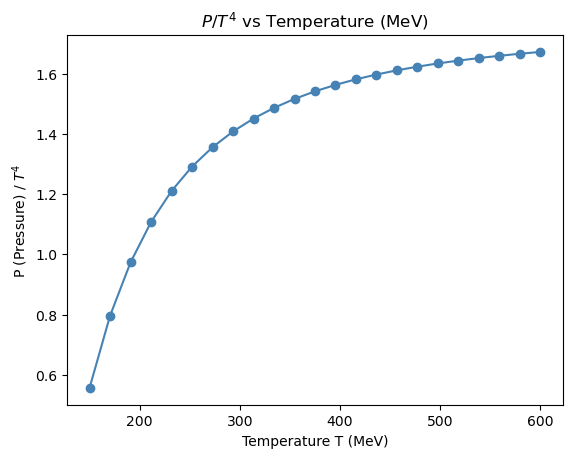

In [8]:
import matplotlib.pyplot as plt
def pressure(T_val):
    T = tf.constant(T_val, dtype=tf.float64)
    omega = omega_total(T)
    return -omega.numpy()
T_vals = np.linspace(150,600,23)
P_vals = [pressure(T) for T in T_vals]

# ET4_vals = [E / T**4 for E, T in zip(E_vals, T_vals)]
PT4_vals = [P / T**4 for P, T in zip(P_vals, T_vals)]
plt.plot(T_vals, PT4_vals, marker='o', label=r"$P/T^4$", color='steelblue')
plt.xlabel("Temperature T (MeV)")
plt.ylabel("P (Pressure) / $T^4$")
plt.title("P/ $T^4$ vs $T$")
plt.title(r"$P/T^4$ vs Temperature (MeV)")
plt.show()

Scaling by $T^4$ allows for a comparison with the Stefan-Boltzmann limit, highlighting deviations due to interactions and medium effects.


## 2) Calculating Energy Density 

$$
E(k, T) = -T^2 \left[ \frac{\partial}{\partial T} \left( \frac{\Omega_{\text{total}}}{T} \right) \right]
$$

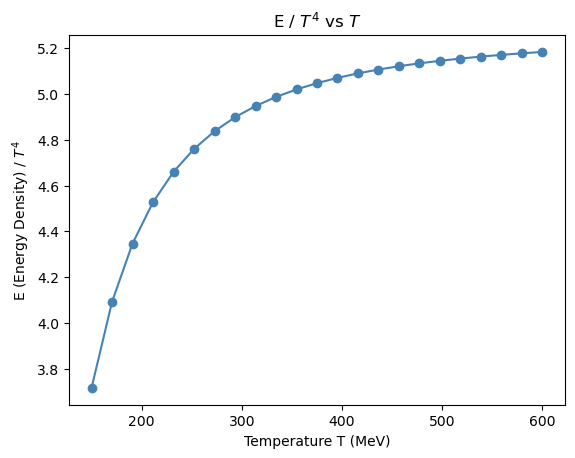

In [9]:
def energy_density(T_val):
    T = tf.Variable(T_val, dtype=tf.float64)

    with tf.GradientTape() as tape:
        omega = omega_total(T)
        omega_over_T = omega / T

    dOmega_dT = tape.gradient(omega_over_T, T)
    return (-T_val**2 * dOmega_dT.numpy())

T_vals = np.linspace(150.0, 600.0, 23)
E_vals = [energy_density(T) for T in T_vals]
ET4_vals = [E / T**4 for E, T in zip(E_vals, T_vals)]

plt.plot(T_vals, ET4_vals, marker='o', color='steelblue')
plt.xlabel("Temperature T (MeV)")
plt.ylabel("E (Energy Density) / $T^4$")
plt.title("E / $T^4$ vs $T$")
plt.show()

## 3) Calculating Interaction Term

The Interaction term refers to the force or potential that governs the interactions between the constituent quarks and gluons
within the plasma and is defined as 
$$
I= E - 3P 
$$
where (E = Energy Density, P= Pressure)

---
Unlike in ideal gas, where E = 3P, the interaction term indicates deviations from this relationship which are crucial for
understanding the thermodynamic properties of the system.

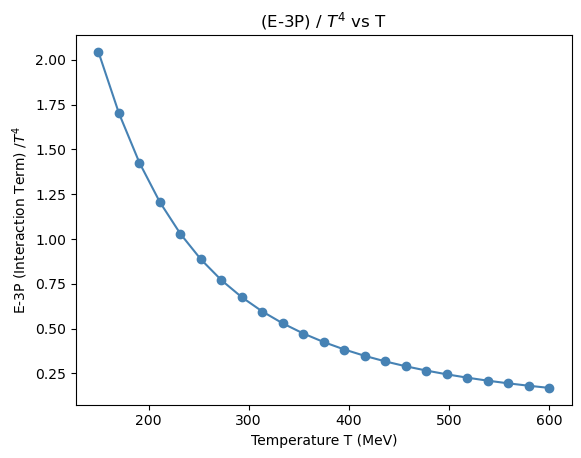

In [10]:
I_vals = [E - 3 * P for E, P in zip(E_vals, P_vals)]
IT4_vals = [I / T**4 for I, T in zip(I_vals, T_vals)]

plt.plot(T_vals, IT4_vals, marker='o', color='steelblue')
plt.xlabel('Temperature T (MeV)')
plt.ylabel('E-3P (Interaction Term) /$T^4$')
plt.title('(E-3P) / $T^4$ vs T')
plt.show()

## 3) Calculating Entropy

$$
S(k, T) = -\frac{4}{3}T \left[ \frac{\partial}{\partial T} \left( \frac{\Omega_{\text{total}}}{T} \right) \right]
$$


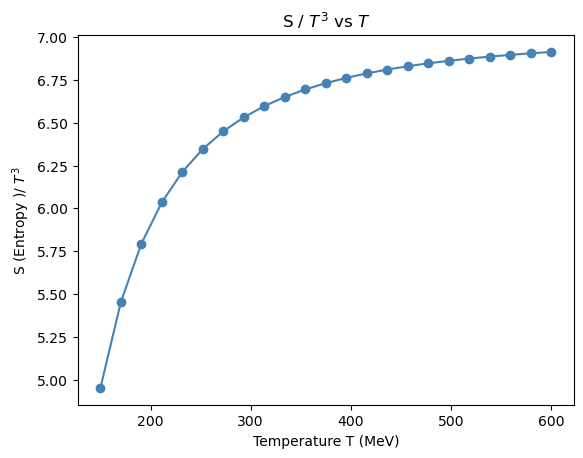

In [11]:
def entropy(T_val):
    T = tf.Variable(T_val, dtype=tf.float64)

    with tf.GradientTape() as tape:
        omega = omega_total(T)
        omega_over_T = omega / T

    dOmega_dT = tape.gradient(omega_over_T, T)
    return (-4*T_val/3.0* dOmega_dT.numpy())

T_vals = np.linspace(150.0, 600.0, 23)
S_vals = [entropy(T) for T in T_vals]
ST3_vals = [S / T**3 for S, T in zip(S_vals, T_vals)]

plt.plot(T_vals, ST3_vals, marker='o', color='steelblue')
plt.xlabel("Temperature T (MeV)")
plt.ylabel("S (Entropy )/ $T^3$")
plt.title("S / $T^3$ vs $T$")
plt.show()

Scaling by $T^3$ allows for a comparison with the Stefan-Boltzmann limit.

## 4) Calculating Specific Heat

$$
C_v(k, T) = T \left[ \frac{\partial S}{\partial T} \right]
$$

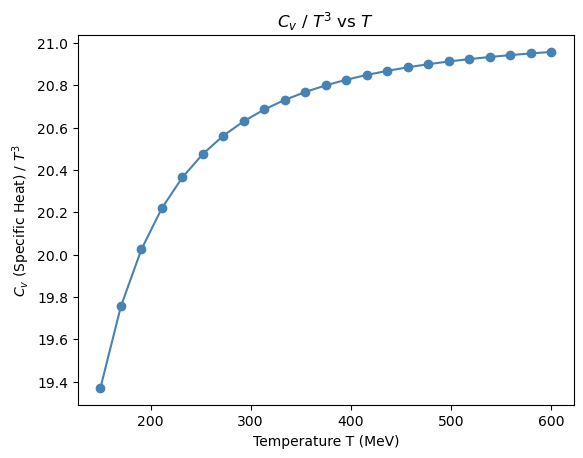

In [12]:
def specific_heat(T_val):
    T = tf.Variable(T_val, dtype=tf.float64)

    with tf.GradientTape() as outer_tape:
        with tf.GradientTape() as inner_tape:
            omega = omega_total(T)
            omega_over_T = omega / T
        dOmega_dT = inner_tape.gradient(omega_over_T, T)
        S = -4 * T / 3.0 * dOmega_dT
    dS_dT = outer_tape.gradient(S, T)
    Cv = T * dS_dT
    return Cv.numpy()

Cv_vals = [specific_heat(T) for T in T_vals]
CvT3_vals = [C / T**3 for C, T in zip(Cv_vals, T_vals)]

plt.plot(T_vals, CvT3_vals, marker='o', color='steelblue')
plt.xlabel("Temperature T (MeV)")
plt.ylabel("$C_v$ (Specific Heat) / $T^3$")
plt.title("$C_v$ / $T^3$ vs $T$")
plt.show()

## 5) Calculating Speed of Sound

Now using the entropy and specific heat we further calculate the speed of sound  of QGP. 
The Speed of Sound is given as:  
$$
C^2_s = \frac{S}{C_v}
$$


In [17]:
speed_of_sound = np.array(S_vals) / np.array(Cv_vals)
speed_of_sound

array([0.25583434, 0.27618796, 0.28942888, 0.29853917, 0.3050818 ,
       0.30994189, 0.31365213, 0.31654919, 0.31885458, 0.32071904,
       0.32224811, 0.32351748, 0.32458265, 0.32548503, 0.32625605,
       0.32691992, 0.32749552, 0.32799775, 0.32843851, 0.32882738,
       0.32917216, 0.32947923, 0.32975385])

In [18]:
T_vals = np.linspace(150.0, 600.0, 23)
T_vals

array([150.        , 170.45454545, 190.90909091, 211.36363636,
       231.81818182, 252.27272727, 272.72727273, 293.18181818,
       313.63636364, 334.09090909, 354.54545455, 375.        ,
       395.45454545, 415.90909091, 436.36363636, 456.81818182,
       477.27272727, 497.72727273, 518.18181818, 538.63636364,
       559.09090909, 579.54545455, 600.        ])

In [19]:
cs = np.array([0.25583434, np.nan, np.nan, 0.27618796,  0.28942888,  0.30994189, 0.32071904, 0.32458265,  0.32799775, 0.32975385])
T= np.array([150,np.nan,np.nan,170.45454545,190.90909091,252.27272727,293.18181818,375,497.72727273,600.  ])

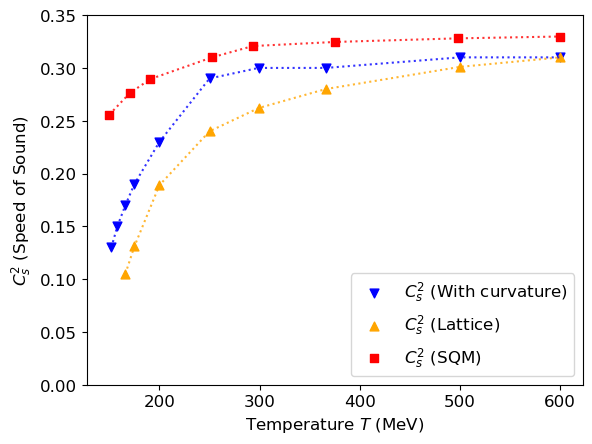

In [20]:
# Given data
T_qcd = np.array([152, 158, 166, 175, 200, 250, 299, 366, 500, 600])
cs_qcd2 = np.array([0.13, 0.15, 0.17, 0.19, 0.23, 0.29, 0.3, 0.3, 0.31, 0.31])
cs_qcd1 = np.array([np.nan, np.nan, 0.105, 0.131, 0.189, 0.24, 0.262, 0.28, 0.301, 0.31])

plt.scatter(T_qcd, cs_qcd2, label=r'$C_s^2$ (With curvature)', color='blue', marker='v', s=40)
plt.scatter(T_qcd, cs_qcd1, label=r'$C_s^2$ (Lattice)', color='orange', marker='^', s=40)
plt.scatter(T, cs, label=r'$C_s^2$ (SQM)', color='red', marker='s', s=40)

# Connect only non-NaN values using mask
plt.plot(T_qcd[~np.isnan(cs_qcd2)], cs_qcd2[~np.isnan(cs_qcd2)], color='blue', linestyle=':', alpha=0.8)
plt.plot(T_qcd[~np.isnan(cs_qcd1)], cs_qcd1[~np.isnan(cs_qcd1)], color='orange', linestyle=':', alpha=0.8)
plt.plot(T[~np.isnan(cs)], cs[~np.isnan(cs)], color='red', linestyle=':', alpha=0.8)

plt.xlabel(r'Temperature $T$ (MeV)', fontsize=12)
plt.ylabel(r"$C_s^2$ (Speed of Sound)", fontsize=12)
plt.ylim(0, 0.35)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', fontsize=12)

Speed of sound calculated from our theoretical Model (SQM) is compared with Lattice data and with curvature data.

We calculate the **RMSE** (Root Mean Square Error) and the **$\chi^2$** value to compare the speed of sound predicted by the SQM model with the values from curvature data.

In [39]:
from sklearn.metrics import mean_squared_error

cs = np.array([0.25583434, np.nan, np.nan, 0.27618796,  0.28942888,  0.30994189, 0.32071904, 0.32458265,  0.32799775, 0.32975385])
cs_qcd2 = np.array([0.13, 0.15, 0.17, 0.19, 0.23, 0.29, 0.3, 0.3, 0.31, 0.31])

# Mask valid entries (not NaN in both arrays)
mask = ~np.isnan(cs) & ~np.isnan(cs_qcd2)

# Cleaned arrays
cs_clean = cs[mask]
cs_qcd2_clean = cs_qcd2[mask]

rmse = np.sqrt(mean_squared_error(cs_qcd2_clean, cs_clean))

chi2 = np.sum((cs_qcd2_clean - cs_clean)**2/rmse**2)

print(f"RMSE (Root Mean Square Error)  = {rmse:.5f}")
print(f"Chi²     = {chi2:.5f}")


RMSE (Root Mean Square Error)  = 0.06015
Chi²     = 8.00000


We calculate the **RMSE** (Root Mean Square Error) and the **$\chi^2$** value to compare the speed of sound predicted by the SQM model with the values from lattice data.

In [40]:
cs = np.array([0.25583434, np.nan, np.nan, 0.27618796,  0.28942888,  0.30994189, 0.32071904, 0.32458265,  0.32799775, 0.32975385])
cs_qcd1 = np.array([np.nan, np.nan, 0.105, 0.131, 0.189, 0.24,
                    0.262, 0.28, 0.301, 0.31])

# Mask valid entries (not NaN in both arrays)
mask = ~np.isnan(cs) & ~np.isnan(cs_qcd1)

# Cleaned arrays
cs_clean = cs[mask]
cs_qcd1_clean = cs_qcd1[mask]

rmse = np.sqrt(mean_squared_error(cs_qcd1_clean, cs_clean))

chi2 = np.sum((cs_clean - cs_qcd1_clean)**2/rmse**2)

print(f"RMSE (Root Mean Square Error)    = {rmse:.5f}")
print(f"Chi² value    = {chi2:.5f}")

RMSE (Root Mean Square Error)    = 0.07802
Chi² value    = 7.00000


## Conclusion & Future Work <a name = 'h5'><a>


* We investigated strange quark matter (SQM) in neutron star cores using the DDQM model.
* The thermodynamic quantities were computed such as pressure, energy density, entropy, and specific heat to construct the equation of state (EoS).
* Further the speed of sound was computed and compared with lattice and curvature data, observing the same trend at higher temperatures.
* The future studies can explore models with quark masses dependent on both temperature and density.
* Deep learning can be implemented for efficient computation of higher-order derivatives.
* The radial pulsations can also be calculated to understand the stability and structure of neutron stars.